In [4]:
import pandas as pd 

In [ ]:
all_data

In [5]:
cols = ['rate', 'review_text', 'object_address']
all_data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/data_nlp/google_reviews_RGPD.csv', usecols=cols)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16645 entries, 0 to 16644
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rate            16645 non-null  int64 
 1   review_text     9538 non-null   object
 2   object_address  16645 non-null  object
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [6]:
all_data.dropna(subset=['review_text'], inplace=True)

In [7]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')

In [ ]:
all_data

In [13]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
!python -m spacy download fr_core_news_sm

all_data['review_text'] = all_data['review_text'].astype(str)
fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    
    # Enlever les ponctuations
    text = text.str.replace(r'[^\w\s]|_', '')
    
    # Lemmatisation et suppression des stopwords
    text = text.apply(lambda x: ' '.join([token.lemma_ for token in fr(x) if token.pos_ != 'VERB' and token.lemma_ not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    # Enlever les espaces en trop
    text = text.str.replace(r'\s+', ' ')
    
    # Enlever les espaces en début et fin de texte
    text = text.str.strip()

    return text

all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))


     |████████████████████████████████| 16.3 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [6]:
# Créer un dataframe avec les données nettoyées
all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))

KeyboardInterrupt: 

In [7]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')
all_data

,rate,review_text,object_address,cleaned_text
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",formation financement refus refus parcours inu...
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci faire rond p...
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",fonctionnaire incompétent arrogant prétentieux...
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci air hautain ...
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",étoile mettrai conseiller indemnisation désagr...
...,...,...,...,...
16623,3,j'ai eu soixante ans le 15 mars ; suis je obli...,"45 Av. Billaud Varenne, 17000 La Rochelle",soixant mars pointé
16624,3,Un pôle emploi comme un autre,"45 Av. Billaud Varenne, 17000 La Rochelle",pôle
16625,1,Incompétents.,"45 Av. Billaud Varenne, 17000 La Rochelle",incompétent
16626,1,Sourires en option,"45 Av. Billaud Varenne, 17000 La Rochelle",sourire option


In [8]:
# Créer le DataFrame groupé avec la moyenne des rates
grouped = all_data.pivot_table(index='object_address', values=['cleaned_text', 'rate'], aggfunc={'cleaned_text': ' '.join, 'rate': 'mean'}).reset_index()

# Arrondir la note moyenne à une décimale
grouped['rate'] = grouped['rate'].apply(lambda x: round(x, 1))

# Afficher le DataFrame groupé


In [9]:
grouped['cleaned_text'] = grouped['cleaned_text'].str.replace('...', ' ')

In [12]:
grouped

,object_address,cleaned_text,rate
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2
...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel genre lieu souligner propre ...,3.6
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8


In [14]:
from collections import Counter

# Fonction pour compter les mots dans un texte
def count_words(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts

# Compter les mots dans chaque texte regroupé
grouped['word_counts'] = grouped['cleaned_text'].apply(count_words)

# Afficher le DataFrame avec la nouvelle colonne
grouped


,object_address,cleaned_text,rate,word_counts
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6,"{'tentative': 1, 'rendez-vous': 3, 'téléphoniq..."
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6,"{'agence': 3, 'intérêt': 2, 'radiation': 2, 's..."
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5,"{'chômage': 2, 'avril': 1, '2022': 1, 'impossi..."
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4,"{'distance': 1, 'accompagnement': 1, 'simpleme..."
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2,"{'présent': 1, 'rendez-vous': 1, 'travail': 2,..."
...,...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8,"{'autant': 1, 'chomé': 1, 'inverse': 1, 'the':..."
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5,"{'appel': 1, 'conseiller': 1, 'vraiment': 1, '..."
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel genre lieu souligner propre ...,3.6,"{'endroit': 1, 'personnel': 1, 'genre': 1, 'li..."
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8,"{'convoqu': 1, 'sen': 1, 'convocation': 2, 'te..."


In [16]:
from collections import Counter

# Fonction pour générer un rapport intelligent sur les comptages de mots
def generate_word_counts_report(word_counts, average_rate):
    # Total de mots
    total_words = sum(word_counts.values())

    # Les 10 mots les plus fréquents
    top_10_words = word_counts.most_common(10)

    # Moyenne de fréquence des mots
    average_frequency = total_words / len(word_counts)

    # Génération du rapport
    report = f"Total de mots : {total_words}\n"
    report += f"Moyenne de fréquence des mots : {average_frequency}\n"
    report += f"Moyenne des notes : {average_rate}\n"  # Nouvelle ligne pour afficher la note moyenne
    report += "\nLes 10 mots les plus fréquents :\n"
    for word, count in top_10_words:
        report += f"{word} : {count}\n"

    return report

# Générer le rapport pour chaque lieu
for index, row in grouped.iterrows():
    location = row['object_address']
    word_counts = row['word_counts']
    average_rate = row['rate']  # Récupérer la note moyenne du DataFrame
    report = generate_word_counts_report(word_counts, average_rate)
    print(f"Rapport pour le lieu : {location}\n")
    print(report)
    print("==============================\n")


Rapport pour le lieu : 0 Rue Olympe de Gouges, 45300 Pithiviers

Total de mots : 168
Moyenne de fréquence des mots : 1.344
Moyenne des notes : 2.6

Les 10 mots les plus fréquents :
heure : 4
bien : 4
rendez-vous : 3
pôle : 3
conseiller : 3
accueil : 3
agréable : 3
dossier : 3
aucun : 3
mois : 3


Rapport pour le lieu : 1 A Rue du Clos Jeune, 25500 Morteau

Total de mots : 130
Moyenne de fréquence des mots : 1.3829787234042554
Moyenne des notes : 1.6

Les 10 mots les plus fréquents :
conseiller : 6
... : 5
emploi : 5
jamais : 4
mois : 4
agence : 3
.... : 3
impossible : 3
morteau : 3
intérêt : 2


Rapport pour le lieu : 1 All. des Citronniers, 44000 Nantes

Total de mots : 299
Moyenne de fréquence des mots : 1.397196261682243
Moyenne des notes : 2.5

Les 10 mots les plus fréquents :
accueil : 7
rendez-vous : 7
bien : 6
professionnel : 5
rien : 5
personnel : 5
dossier : 4
emploi : 4
aucun : 4
fois : 4


Rapport pour le lieu : 1 All. des Fabricants, 59150 Wattrelos

Total de mots : 205
Moy

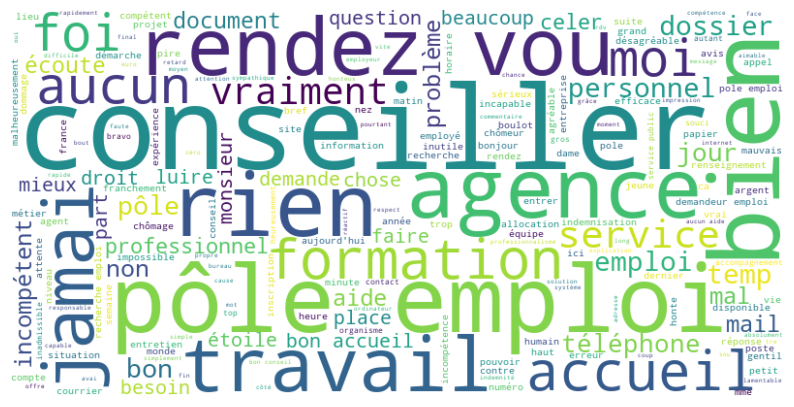

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concaténer tous les textes dans une seule chaîne de caractères
text = ' '.join(all_data['cleaned_text'].values)

# Créer l'objet WordCloud avec les paramètres souhaités
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:
pos = all_data[all_data['rate'] >= 2.5]
neg = all_data[all_data['rate'] < 2.5]

In [23]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [21]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [43]:
corpus = [
    "Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.",
    "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
    "Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.", 
    "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable.",
    # Ajoutez d'autres reviews ici
]

In [35]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [22]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [29]:
hello = ["Une équipe recruté pour ces compétences en manipulation, tout est fait pour vous pousser à la faute et obtenir le saint graal de la radiation, du coup de téléphone à 1 sonnerie (si vous ne répondez vous recevez un mail vous indiquant être radié pour manquement à vos obligations), à la soit disant non réception de mail ou justificatifs, pareil radiation alors que vous disposez de toutes les preuves d'envoi.\
Un conseiller qui cherche à vous faire dire ce que vous n'avez pas dit pour vous faire sortir de vos ""obligations"" et donc justifié une radiation."]

In [47]:
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

preprocessed_corpus = [preprocess_text(review) for review in corpus]

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

# Construction du corpus négatif
negative_reviews = []
for review in preprocessed_corpus:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:
        negative_reviews.append(review)

# Création de la matrice c-TF-IDF
stopwords = set(stopwords.words("french"))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)




# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-10:][::-1]  # Sélectionne les 5 scores les plus importants
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))  # Supprime les doublons

print("Mots les plus récurrents pour les commentaires négatifs :")
print(top_negative_words)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Mots les plus récurrents pour les commentaires négatifs :
['prix', 'incompétent', 'aimé', 'personnel', 'vraiment', 'immangeable', 'endroit', 'tout', 'service', 'médiocre', 'nourriture', 'impoli', 'recommande', 'offrent', 'exorbitants', 'établissement', 'horrible', 'cet', 'lieu']


In [42]:
df_sample

,rate,review_text,object_address,sentiment,cleaned_text,preprocessed_text,result
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,formation financement refus refus parcours inu...,formation financement refus refus parcours inu...,fabien
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci faire rond p...,aucun respect pourtant bien souci faire rond p...,fourni
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,fonctionnaire incompétent arrogant prétentieux...,fonctionnaire incompétent arrogant prétentieux...,document
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci air hautain ...,aucun respect pourtant bien souci air hautain ...,citoyen
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,étoile mettrai conseiller indemnisation désagr...,étoile mettrai conseiller indemnisation désagr...,droit
5,1,Une conseillère carrément hautaine au téléphon...,"5 Rue de Quimper, 68100 Mulhouse",0,conseiller hautain téléphone démarche conjoint...,conseiller hautain téléphone démarche conjoint...,conseiller
6,1,Les travailleurs sous-scolarisés ont un fouill...,"5 Rue de Quimper, 68100 Mulhouse",0,travailleur fouillis document,travailleur fouillis document,air
7,1,Mauvaise expérience avec cette établissement. ...,"5 Rue de Quimper, 68100 Mulhouse",0,mauvais expérience établissement général pôle ...,mauvais expérience établissement général pôle ...,incompétent
8,1,On a un rendez-vous mais on doit attendre enco...,"5 Rue de Quimper, 68100 Mulhouse",0,rendez-vous minute inaccessible,rendez vous minute inaccessible,région
9,1,"Bonjour, en ce moment il n'y a pas de Pôle emp...","5 Rue de Quimper, 68100 Mulhouse",0,bonjour moment pôle région,bonjour moment pôle région,inutile


In [51]:
# Création de la matrice c-TF-IDF avec n-grams
vectorizer = TfidfVectorizer(stop_words=list(stopwords), ngram_range=(1, 3))
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)

# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-5:][::-1]  # Sélectionne les 10 scores les plus importants
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))  # Supprime les doublons

print("Mots les plus récurrents pour les commentaires négatifs :")
print(top_negative_words)


Mots les plus récurrents pour les commentaires négatifs :
['recommande', 'lieu horrible service', 'nourriture immangeable', 'incompétent recommande vraiment', 'immangeable', 'offrent', 'endroit', 'exorbitants offrent', 'exorbitants', 'établissement', 'horrible service médiocre', 'incompétent recommande', 'impoli incompétent', 'service', 'aimé']


In [ ]:
from collections import Counter
split_it = streemed_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
cleaned_text = cleaned_text(example)

In [ ]:
example = stem_text(clean_text)


In [39]:
all_data.to_csv('all_data.csv', index=False)

In [ ]:

fr = spacy.load("fr_core_news_sm")

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

# Appeler la fonction lemmatize_text() sur le texte
lemmatized_text = lemmatize_text(clean_text)

In [ ]:
lemmatized_text

In [ ]:
lemmatized_text
from collections import Counter
split_it = lemmatized_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
lemmatized_text

In [ ]:
from PIL import Image
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

Prendre un n gram 

In [ ]:
lemmatized_text_modified = ' '.join([word for word in lemmatized_text.split() if len(word) > 3])


In [ ]:
lemmatized_text_modified

In [ ]:
from collections import Counter
split_it = lemmatized_text_modified.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

In [ ]:
import pandas as pd

# Exemple de DataFrame avec une colonne 'text'
data = pd.DataFrame({'text': ['service client, aidez-moi s\'il vous plaît', 'j\'ai besoin d\'aide', 'merci pour votre soutien']})

# Appliquer la transformation sur chaque valeur de la colonne 'text'
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))

data


In [11]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)


In [ ]:
cleaned_text = cleaned_text(exemple)

In [ ]:
cleaned_text

In [ ]:
from collections import Counter

# Utiliser la méthode apply() pour appliquer split() à chaque élément de la série
split_it = cleaned_text.apply(lambda x: x.split())

# Compter les occurrences des mots
word_counts = Counter([word for sublist in split_it for word in sublist])
word_counts


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)
cleaned_text_str = " ".join(cleaned_text)

import spacy
nlp = spacy.load("fr_core_news_sm")
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

def  stem_text(text):
    doc = fr(text)
    stem_sentences = []
    for sent in doc.sents:
        stem_tokens = [stemmer.stem(token.text) for token in sent]
        stem_sentence = " ".join(stem_tokens)
        stem_sentences.append(stem_sentence)
    return " ".join(stem_sentences)

stemmed_text = stem_text(cleaned_text_str)
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    
    # Enlever les apostrophes
    text = re.sub(r'\'', ' ', text)
    # Enlever les points
    text = re.sub(r'\.', ' ', text)
    # Enlever les virgules
    text = re.sub(r',', ' ', text)

    # Enlever les ponctuations et les caractères spéciaux
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Enlever les stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Enlever les chiffres et les nombres
    text = re.sub(r'\d+', '', text)
    
    # Enlever les mots de 2 lettres
    text = ' '.join([word for word in text.split() if len(word) > 2])

    return text

# Appeler la fonction clean_text() sur la variable stemmed_text
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
clean_stemmed_text

In [ ]:
#counter
from collections import Counter
clean_stemmed_text_counter = Counter(clean_stemmed_text.split())
clean_stemmed_text_counter

In [9]:
all_data['sentiment'] = all_data['rate'].apply(lambda x: 1 if x >= 2.5 else 0)

In [43]:
all_data.to_csv('all_data.csv', index=False)

In [14]:
df_ps = all_data[all_data['sentiment'] == 1].to_csv('df_ps.csv', index=False)

In [15]:
df_ng = all_data[all_data['sentiment'] == 0].to_csv('df_ng.csv', index=False)

In [24]:
import pandas as pd
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

df = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
df['cleaned_text'].dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['cleaned_text'] = df['review_text'].astype(str)
df = df.head(10)
def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

# Assume you have a dataframe called 'df' with a column 'reviews' containing the negative reviews

preprocessed_reviews = df['cleaned_text'].apply(preprocess_text)

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

negative_words = []

for review in preprocessed_reviews:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:  # Negative label
        words = review.split()
        negative_words.append(words)

df['negative_words'] = negative_words


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [25]:
df

,rate,review_text,object_address,sentiment,cleaned_text,negative_words
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,Pas de formation possible Pas de financement p...,"[pas, de, formation, possible, pas, de, financ..."
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ..."
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,"Les fonctionnaires incompétents, arrogants et ...","[les, fonctionnaires, incompétents, arrogants,..."
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ..."
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,Si je pouvais ne pas mettre d'étoiles je n'en ...,"[si, je, pouvais, ne, pas, mettre, d, étoiles,..."
5,1,Une conseillère carrément hautaine au téléphon...,"5 Rue de Quimper, 68100 Mulhouse",0,Une conseillère carrément hautaine au téléphon...,"[une, conseillère, carrément, hautaine, au, té..."
6,1,Les travailleurs sous-scolarisés ont un fouill...,"5 Rue de Quimper, 68100 Mulhouse",0,Les travailleurs sous-scolarisés ont un fouill...,"[les, travailleurs, sous, scolarisés, ont, un,..."
7,1,Mauvaise expérience avec cette établissement. ...,"5 Rue de Quimper, 68100 Mulhouse",0,Mauvaise expérience avec cette établissement. ...,"[mauvaise, expérience, avec, cette, établissem..."
8,1,On a un rendez-vous mais on doit attendre enco...,"5 Rue de Quimper, 68100 Mulhouse",0,On a un rendez-vous mais on doit attendre enco...,"[on, a, un, rendez, vous, mais, on, doit, atte..."
9,1,"Bonjour, en ce moment il n'y a pas de Pôle emp...","5 Rue de Quimper, 68100 Mulhouse",0,"Bonjour, en ce moment il n'y a pas de Pôle emp...","[bonjour, en, ce, moment, il, n, y, a, pas, de..."


In [48]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("camembert-base")

model = AutoModelForMaskedLM.from_pretrained("camembert-base")

In [63]:
data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')

In [64]:
data

,rate,review_text,object_address,sentiment,cleaned_text
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,formation financement refus refus parcours inu...
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci faire rond p...
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,fonctionnaire incompétent arrogant prétentieux...
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci air hautain ...
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,étoile mettrai conseiller indemnisation désagr...
...,...,...,...,...,...
5879,1,"La gentillesse chez vous , c’est pas une quali...","45 Av. Billaud Varenne, 17000 La Rochelle",0,gentillesse qualité désagréable accueil
5880,1,Le 3949 est le pire numéro de renseignement qu...,"45 Av. Billaud Varenne, 17000 La Rochelle",0,3949 pire numéro renseignement malheur
5881,1,Incompétents.,"45 Av. Billaud Varenne, 17000 La Rochelle",0,incompétent
5882,1,Sourires en option,"45 Av. Billaud Varenne, 17000 La Rochelle",0,sourire option


In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Créez un dataframe de test

data["cleaned_text"] = data["review_text"].astype(str)
# Initialisez le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Calculez la représentation TF-IDF des documents
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Créez un dataframe à partir de la matrice TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Triez les scores TF-IDF du dataframe par ordre décroissant pour chaque document
top_words_per_document = {}
for doc_index in range(len(df)):
    scores = zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix[doc_index].toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_words_per_document[doc_index] = sorted_scores[:5]  # Modifier ici pour obtenir le top 5

# Affichez les 5 meilleurs mots pour chaque document
for doc_index, top_words in top_words_per_document.items():
    print(f"Document {doc_index + 1}:")
    for word, score in top_words:
        print(f"- {word}: {score}")
    print()


Document 1:
- refus: 0.46369695158812513
- possible: 0.34509678379521963
- absurde: 0.3029195725073177
- régulier: 0.3029195725073177
- réactif: 0.27760353706240687

Document 2:
- pourtant: 0.44770925303583053
- fourni: 0.28424632309802766
- tourner: 0.28424632309802766
- exprès: 0.27677766712246155
- rond: 0.27677766712246155

Document 3:
- bunker: 0.28305213286354586
- cinquième: 0.28305213286354586
- mendier: 0.28305213286354586
- obligeant: 0.28305213286354586
- traitant: 0.2702817340485799



In [69]:
data["cleaned_text"] = data["review_text"].astype(str)

# Effectuer un join sur la colonne "cleaned_text" pour obtenir le texte complet
text = ' '.join(data['cleaned_text'])

# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Calculer la représentation TF-IDF pour le texte complet
tfidf_matrix = tfidf_vectorizer.fit_transform([text])

# Obtenir les scores TF-IDF pour chaque mot dans le texte complet
scores = zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0])

# Trier les scores par ordre décroissant
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

# Afficher les top 5 mots les plus utilisés
print("Top 5 mots les plus utilisés :")
for word, score in sorted_scores[:5]:
    print(f"- {word}: {score}")

Top 5 mots les plus utilisés :
- de: 0.47596379333004696
- et: 0.2777873901605424
- pas: 0.25162324171755013
- je: 0.202942363294808
- que: 0.1932159140594949


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
data["cleaned_text"] = data["review_text"].astype(str)

# Effectuer un join sur la colonne "cleaned_text" pour obtenir le texte complet
text = ' '.join(data['cleaned_text'])

# Initialiser le vectoriseur CountVectorizer
count_vectorizer = CountVectorizer()

# Calculer la représentation en comptage des mots pour le texte complet
count_matrix = count_vectorizer.fit_transform([text])

# Obtenir les fréquences des mots dans le texte complet
word_frequencies = zip(count_vectorizer.get_feature_names_out(), count_matrix.toarray()[0])

# Trier les mots par fréquence décroissante
sorted_frequencies = sorted(word_frequencies, key=lambda x: x[1], reverse=True)

# Afficher les 5 mots les plus fréquents
print("Top 5 mots les plus fréquents :")
for word, frequency in sorted_frequencies[:50]:
    print(f"- {word}: {frequency}")

Top 5 mots les plus fréquents :
- de: 9787
- et: 5712
- pas: 5174
- je: 4173
- que: 3973
- un: 3908
- pour: 3888
- vous: 3853
- le: 3818
- est: 3751
- les: 3613
- la: 3462
- ne: 3291
- des: 3179
- en: 3053
- une: 3024
- qui: 2657
- on: 2515
- emploi: 2510
- il: 2098
- ai: 1911
- me: 1832
- au: 1778
- ils: 1777
- qu: 1664
- du: 1611
- ce: 1496
- pôle: 1356
- plus: 1334
- sur: 1277
- mon: 1276
- rien: 1273
- dans: 1239
- par: 1187
- sont: 1163
- faire: 1158
- avec: 1137
- mais: 1063
- même: 1013
- se: 991
- si: 986
- tout: 980
- ma: 871
- leur: 855
- nous: 848
- sans: 796
- suis: 796
- très: 784
- elle: 780
- fait: 745


In [75]:
all_data =all_data.sample(10)

In [ ]:
all_data.reset_index(drop=True, inplace=True)
all_data.drop(columns=['sentiment'], inplace=True)


In [79]:
all_data

,rate,review_text,object_address,cleaned_text
0,1,lamabilité de l'acceuille .. limite si il te c...,"17 Rte de Nantes, 56860 Séné",lamabilité acceuille limite dessu contre moin ...
1,2,Ne sert pas à grand chose... Dommage,"104 Av Du, Av. Dr Jean Bru, 47000 Agen",grand chose ... dommage
2,4,Super accueil et agents très professionnels,"Pl. du Quatorze Juillet, 65300 Lannemezan",accueil agent professionnel
3,3,Est il possible de mettre en place l'accès à d...,"93 Rue de la Marne, 95220 Herblay-sur-Seine",place accès toilette rue pari toilette public ...
4,3,"Merci pour le travail, ca mas permis de avoi...","3 Rue Germain Authié, 09000 Foix",travail mas retraite normal
5,4,Serviable,"6 All. du 24 Juillet 1712, 59220 Denain",serviable
6,1,Jamais ces gens trouveront un travail pour que...,"1 Pl. des Magnolias, 80480 Dury",jamais travail quelq' moyen taux chômeur radié...
7,1,"Très mauvais suivi concernant les formations, ...","16 Rue du Colonel Francis Nicol, 59400 Cambrai",mauvais formation dossier ... jamais aucun sol...
8,1,Ne pas compter sur Pôle emploi concernant plan...,"31 Bd Charles Moretti, 13014 Marseille",pôle emploi plan formation
9,1,Il serait sympa de mettre à jour vos horaires ...,"354 A Av. de Chabeuil, 26000 Valence",sympa jour horaire site aujourd'hui rien


In [82]:
import pandas as pd
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

# Charger le modèle de sentiment analysis et le tokenizer
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

# Créer le pipeline de sentiment analysis
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Exemple de DataFrame avec des notes négatives
all_data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/all_data.csv')
all_data =all_data.sample(10)
all_data.reset_index(drop=True, inplace=True)
all_data.drop(columns=['sentiment'], inplace=True)
all_data['cleaned_text'] = all_data["review_text"].astype(str)

# Appliquer le pipeline de sentiment analysis sur les textes
all_data['sentiment'] = all_data['cleaned_text'].apply(lambda x: nlp(x)[0]['label'])


# On retire la colonne "sentiment" qui n'est plus utile
all_data.drop(columns=['sentiment'], inplace=True)
# grace au model on va donné les mots correspondant au sentiment négatif, il faut prendre en comptes le n gram pour avoir les mots qui vont ensemble
# on va faire une fonction qui va prendre en entrée le texte et qui va ressortir les mots négatifs


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [83]:
all_data

,rate,review_text,object_address,cleaned_text,sentiment
0,5,Equipe accueillante et compétente (pas tous ma...,"246 Rue des Canesteu, 13300 Salon-de-Provence",Equipe accueillante et compétente (pas tous ma...,POSITIVE
1,4,Il y a 3 ans je souhaitais me diriger vers un ...,"10 Rue de la Foire aux Chevaux, 77160 Provins",Il y a 3 ans je souhaitais me diriger vers un ...,POSITIVE
2,1,Comme dire certains dans cette agence devrais ...,"650 Av. de la Liberté, 03200 Vichy",Comme dire certains dans cette agence devrais ...,NEGATIVE
3,5,J'y suis allé pour accompagner une personne en...,"64 Av. Alfred Lefrançois, 59200 Tourcoing",J'y suis allé pour accompagner une personne en...,POSITIVE
4,3,Bon accueil.,"1 Rue de l'Euro, 74000 Annecy",Bon accueil.,POSITIVE
5,1,Communication : nulle Aide à la recherche d'em...,"3 Av. de Blida, 57050 Metz",Communication : nulle Aide à la recherche d'em...,NEGATIVE
6,5,J ai apprécier que l on me donne des renseigne...,"141 Rte de Corbeil, 91700 Sainte-Geneviève-des...",J ai apprécier que l on me donne des renseigne...,POSITIVE
7,5,Très bon accueil ce jour. Parfaitement conseil...,"55 Imp. du Bosquet, 33260 La Teste-de-Buch",Très bon accueil ce jour. Parfaitement conseil...,POSITIVE
8,1,"Aucun sérieux dans le suivi des dossiers , à fuir","3 Av. du 8 Mai 1945, 69500 Bron","Aucun sérieux dans le suivi des dossiers , à fuir",NEGATIVE
9,1,Cette agence est d'une incompétence a toute ép...,"124 Rue Louis Curet, 83500 La Seyne-sur-Mer",Cette agence est d'une incompétence a toute ép...,NEGATIVE


In [98]:
import pandas as pd
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

# Définir la fonction pour obtenir les mots négatifs
def get_negative_words(text):
    # Transformer le texte en input pour le modèle
    inputs = tokenizer(text, return_tensors="tf")
    # Obtenir les prédictions du modèle
    outputs = model(inputs)[0]
    # Obtenir la prédiction la plus probable
    prediction = tf.argmax(outputs[0]).numpy()
    # Si la prédiction est 0, le texte est négatif
    if prediction == 0:
        # Obtenir les mots négatifs
        negative_words = [word for word in text.split() if word in tokenizer.get_vocab()]
        # Retourner les mots négatifs
        return negative_words
    # Si la prédiction est 1, le texte est positif
    else:
        # Retourner une liste vide
        return []

# Lire le DataFrame à partir du fichier CSV
all_data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/all_data.csv')
all_data = all_data.sample(10)
all_data.reset_index(drop=True, inplace=True)
all_data.drop(columns=['sentiment'], inplace=True)
all_data['cleaned_text'] = all_data["review_text"].astype(str)

# Appliquer la fonction get_negative_words à la colonne 'cleaned_text'
all_data['negative_words'] = all_data['cleaned_text'].apply(get_negative_words)

# Afficher le DataFrame mis à jour
print(all_data)


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


   rate                                        review_text   
0     5  Je tiens à remercier le Monsieur de l'accueil ...  \
1     1  Ouverture un jour sur deux, convocation pour d...   
2     1  Il semblerai que pole emploi soit en vacance p...   
3     1  Mon fils a voulu s'inscrire pour trouver une f...   
4     1  Véritable catastrophe, chaque fois que vous le...   
5     5  Service civique incroyable. C'est la première ...   
6     1  Nul comme tout les autres. Demande de Rdv avec...   
7     5  Reçu par une volontaire du service civique qui...   
8     5    Écoute et conseils personnalisés et performants   
9     3                                   De mal à se garé   

                                    object_address   
0                        3 Bd Diderot, 75012 Paris  \
1                         8 Rue Racine, 32000 Auch   
2                   10 Rue de Chypre, 44200 Nantes   
3                   13 Rue de Cerçay, 91800 Brunoy   
4            17 A Rue Alain Savary, 25000 Besan

In [99]:
all_data

,rate,review_text,object_address,cleaned_text,negative_words
0,5,Je tiens à remercier le Monsieur de l'accueil ...,"3 Bd Diderot, 75012 Paris",Je tiens à remercier le Monsieur de l'accueil ...,[]
1,1,"Ouverture un jour sur deux, convocation pour d...","8 Rue Racine, 32000 Auch","Ouverture un jour sur deux, convocation pour d...","[un, jour, sur, pour, des, emplois, je, ne, pa..."
2,1,Il semblerai que pole emploi soit en vacance p...,"10 Rue de Chypre, 44200 Nantes",Il semblerai que pole emploi soit en vacance p...,"[Il, que, pole, emploi, soit, en, plus, tôt, q..."
3,1,Mon fils a voulu s'inscrire pour trouver une f...,"13 Rue de Cerçay, 91800 Brunoy",Mon fils a voulu s'inscrire pour trouver une f...,"[Mon, fils, a, pour, une, à, il, y, a, une, fe..."
4,1,"Véritable catastrophe, chaque fois que vous le...","17 A Rue Alain Savary, 25000 Besançon","Véritable catastrophe, chaque fois que vous le...","[fois, que, vous, les, personne, ne, à, vos, s..."
5,5,Service civique incroyable. C'est la première ...,"11 Rue Georges Charpak, 91220 Brétigny-sur-Orge",Service civique incroyable. C'est la première ...,[]
6,1,Nul comme tout les autres. Demande de Rdv avec...,"3 Rue de l'Ouillette, 85200 Fontenay-le-Comte",Nul comme tout les autres. Demande de Rdv avec...,"[comme, tout, les, de, avec, le, change, et, a..."
7,5,Reçu par une volontaire du service civique qui...,"11 Rue Georges Charpak, 91220 Brétigny-sur-Orge",Reçu par une volontaire du service civique qui...,[]
8,5,Écoute et conseils personnalisés et performants,"12 Rue Clemenceau, 61300 L'Aigle",Écoute et conseils personnalisés et performants,[]
9,3,De mal à se garé,"Pl. du Quatorze Juillet, 65300 Lannemezan",De mal à se garé,"[De, mal, à, se]"


In [90]:
import tensorflow as tf
tf.__version__
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [105]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

about_interest_text = "He is interested in learning Natural Language Processing."
about_interest_doc = nlp(about_interest_text)

# Specify a different port, for example, 5050
displacy.serve(about_interest_doc, style="dep", port=5050)


/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/lib/python3.10/site-packages/spacy/displacy/__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5050 ...

Shutting down server on port 5050.


In [106]:
import spacy
nlp = spacy.load("en_core_web_sm")
complete_text = (
    "Gus Proto is a Python developer currently"
    " working for a London-based Fintech company. He is"
    " interested in learning Natural Language Processing."
    " There is a developer conference happening on 21 July"
    ' 2019 in London. It is titled "Applications of Natural'
    ' Language Processing". There is a helpline number'
    " available at +44-1234567891. Gus is helping organize it."
    " He keeps organizing local Python meetups and several"
    " internal talks at his workplace. Gus is also presenting"
    ' a talk. The talk will introduce the reader about "Use'
    ' cases of Natural Language Processing in Fintech".'
    " Apart from his work, he is very passionate about music."
    " Gus is learning to play the Piano. He has enrolled"
    " himself in the weekend batch of Great Piano Academy."
    " Great Piano Academy is situated in Mayfair or the City"
    " of London and has world-class piano instructors."
)
complete_doc = nlp(complete_text)
def is_token_allowed(token):
    return bool(
        token
        and str(token).strip()
        and not token.is_stop
        and not token.is_punct
    )

def preprocess_token(token):
    return token.lemma_.strip().lower()

complete_filtered_tokens = [
    preprocess_token(token)
    for token in complete_doc
    if is_token_allowed(token)
]

complete_filtered_tokens




['gus',
 'proto',
 'python',
 'developer',
 'currently',
 'work',
 'london',
 'base',
 'fintech',
 'company',
 'interested',
 'learn',
 'natural',
 'language',
 'processing',
 'developer',
 'conference',
 'happen',
 '21',
 'july',
 '2019',
 'london',
 'title',
 'application',
 'natural',
 'language',
 'processing',
 'helpline',
 'number',
 'available',
 '+44',
 '1234567891',
 'gus',
 'helping',
 'organize',
 'keep',
 'organize',
 'local',
 'python',
 'meetup',
 'internal',
 'talk',
 'workplace',
 'gus',
 'present',
 'talk',
 'talk',
 'introduce',
 'reader',
 'use',
 'case',
 'natural',
 'language',
 'processing',
 'fintech',
 'apart',
 'work',
 'passionate',
 'music',
 'gus',
 'learn',
 'play',
 'piano',
 'enrol',
 'weekend',
 'batch',
 'great',
 'piano',
 'academy',
 'great',
 'piano',
 'academy',
 'situate',
 'mayfair',
 'city',
 'london',
 'world',
 'class',
 'piano',
 'instructor']

In [122]:
data_neg = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
data_neg['review_text'] = data_neg['review_text'].astype(str)
texte = " ".join(data_neg['review_text'].tolist())


In [118]:
import spacy
from collections import Counter

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")

nlp.max_length = 2000000 

# Analyse de dépendance des phrases
doc = nlp(texte)
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Liste des stop words
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Supprimer les stop words et extraire les termes pertinents avec les dépendances spécifiques
termes_pertinents = [token.text for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Compter l'occurrence des mots
occurrence_mots = Counter(termes_pertinents)

# Afficher les résultats dans l'ordre décroissant
resultats = occurrence_mots.most_common()
for mot, occurrence in resultats:
    print(mot, ":", occurrence)


emploi : 1484
faire : 826
rien : 347
pôle : 291
conseiller : 266
conseillère : 262
mettre : 260
fois : 245
agence : 242
mois : 237
conseillers : 199
désagréable : 196
trouver : 196
aider : 193
voir : 184
bon : 182
travailler : 165
répondre : 161
pole : 156
aller : 151
prendre : 141
personnel : 138
téléphonique : 132
donner : 129
aide : 124
personnes : 123
demander : 120
téléphone : 119
rdv : 118
Pôle : 112
demande : 111
appeler : 109
mauvaise : 109
formation : 106
envoyer : 106
attendre : 105
temps : 103
accueil : 98
rendez-vous : 98
perdre : 98
réponse : 98
grand : 97
impossible : 97
jours : 96
changer : 93
bonne : 92
service : 91
incompétent : 91
disant : 90
cas : 89
public : 89
payer : 88
pire : 84
simple : 84
mail : 83
passer : 83
jour : 82
j : 82
inutile : 81
dossier : 77
manque : 77
faut : 77
incompétents : 76
revoir : 71
site : 71
ans : 71
* : 71
chercher : 67
chômage : 67
rendez : 66
haut : 66
emplois : 65
matin : 64
professionnelle : 63
savoir : 63
comprendre : 62
Pole : 62
he

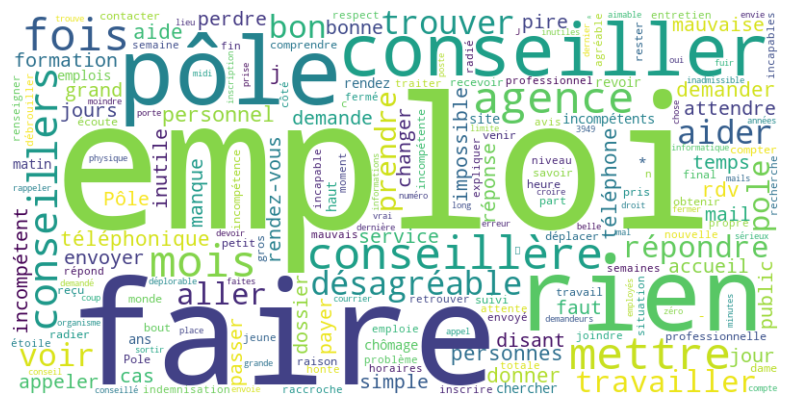

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occurrence_mots)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")

nlp.max_length = 2000000

# Texte d'exemple

# Analyse de dépendance des phrases et lemmatisation
doc = nlp(texte)
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes
use_trigrams = True

if use_trigrams:
    # Génération des trigrammes
    trigrams = list(ngrams(lemmatized_terms, 3, pad_left=True, pad_right=True))
    trigram_terms = [' '.join(trigram) for trigram in trigrams]
    terms_for_cloud = trigram_terms
else:
    # Utilisation des mots lemmatisés
    terms_for_cloud = lemmatized_terms

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(terms_for_cloud)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occurrence_terms)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


TypeError: sequence item 0: expected str instance, NoneType found

In [132]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
import inflect
doc = nlp(texte)
dependances_incluses = ['nsubj', 'xcomp', 'obl:mod', 'acl', 'conj', 'amod']
stop_words = spacy.lang.fr.stop_words.STOP_WORDS
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes
use_trigrams = True

if use_trigrams:
    # Génération des trigrammes
    trigrams = list(ngrams(lemmatized_terms, 2, pad_left=True, pad_right=True))
    trigram_terms = [' '.join(trigram) for trigram in trigrams]
    terms_for_cloud = trigram_terms
else:
    # Utilisation des mots lemmatisés
    terms_for_cloud = lemmatized_terms

# Élévation des pluriels
p = inflect.engine()
pluralized_terms = [p.plural(term) if p.singular_noun(term) is False else term for term in terms_for_cloud]

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(pluralized_terms)
"""
# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occurrence_terms)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()"""

TypeError: sequence item 0: expected str instance, NoneType found

In [ ]:
occurrence_terms

Counter({'emplois': 1620,
         'faires': 869,
         'conseillers': 800,
         'pôles': 402,
         'riens': 356,
         'bons': 335,
         'mettres': 330,
         'trouvers': 275,
         'agences': 273,
         'répondres': 258,
         'prendres': 256,
         'fois': 255,
         'mois': 237,
         'aiders': 231,
         'voirs': 221,
         'incompétents': 218,
         'désagréables': 215,
         'travaillers': 211,
         'allers': 208,
         'personnels': 203,
         'envoyers': 202,
         'demanders': 187,
         'jours': 178,
         'mauvais': 169,
         'donners': 169,
         'recevoirs': 159,
         'payers': 153,
         'appelers': 152,
         'rendez-vous': 152,
         'attendres': 149,
         'téléphoniques': 147,
         'grands': 144,
         'savoirs': 140,
         'professionnels': 139,
         'perdres': 137,
         'demandes': 135,
         'passers': 132,
         'publics': 131,
         'réponses':

In [ ]:
all_data

In [ ]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000

# Texte d'exemple
xt

# Analyse de dépendance des phrases et lemmatisation
doc = nlp(texte)
dependances_incluses = ['nsubj', 'xcomp', 'obl:mod', 'acl', 'conj', 'amod']
stop_words = spacy.lang.fr.stop_words.STOP_WORDS
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes
use_trigrams = True

if use_trigrams:
    # Génération des trigrammes
    trigrams = list(ngrams(lemmatized_terms, 3, pad_left=True, pad_right=True))
    trigram_terms = [' '.join(trigram) for trigram in trigrams]
    terms_for_cloud = trigram_terms
else:
    # Utilisation des mots lemmatisés
    terms_for_cloud = lemmatized_terms

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(terms_for_cloud)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occurrence_terms)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16645 entries, 0 to 16644
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rate            16645 non-null  int64 
 1   review_text     9538 non-null   object
 2   object_address  16645 non-null  object
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [ ]:
all_data.dropna(subset=['review_text'], inplace=True)

In [ ]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')

In [ ]:
all_data

In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
!python -m spacy download fr_core_news_sm

all_data['review_text'] = all_data['review_text'].astype(str)
fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    
    # Enlever les ponctuations
    text = text.str.replace(r'[^\w\s]|_', '')
    
    # Lemmatisation et suppression des stopwords
    text = text.apply(lambda x: ' '.join([token.lemma_ for token in fr(x) if token.pos_ != 'VERB' and token.lemma_ not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    # Enlever les espaces en trop
    text = text.str.replace(r'\s+', ' ')
    
    # Enlever les espaces en début et fin de texte
    text = text.str.strip()

    return text

all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))


     |████████████████████████████████| 16.3 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
# Créer un dataframe avec les données nettoyées
all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))

KeyboardInterrupt: 

In [ ]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')
all_data

,rate,review_text,object_address,cleaned_text
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",formation financement refus refus parcours inu...
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci faire rond p...
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",fonctionnaire incompétent arrogant prétentieux...
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci air hautain ...
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",étoile mettrai conseiller indemnisation désagr...
...,...,...,...,...
16623,3,j'ai eu soixante ans le 15 mars ; suis je obli...,"45 Av. Billaud Varenne, 17000 La Rochelle",soixant mars pointé
16624,3,Un pôle emploi comme un autre,"45 Av. Billaud Varenne, 17000 La Rochelle",pôle
16625,1,Incompétents.,"45 Av. Billaud Varenne, 17000 La Rochelle",incompétent
16626,1,Sourires en option,"45 Av. Billaud Varenne, 17000 La Rochelle",sourire option


In [ ]:
# Créer le DataFrame groupé avec la moyenne des rates
grouped = all_data.pivot_table(index='object_address', values=['cleaned_text', 'rate'], aggfunc={'cleaned_text': ' '.join, 'rate': 'mean'}).reset_index()

# Arrondir la note moyenne à une décimale
grouped['rate'] = grouped['rate'].apply(lambda x: round(x, 1))

# Afficher le DataFrame groupé


In [ ]:
grouped['cleaned_text'] = grouped['cleaned_text'].str.replace('...', ' ')

In [ ]:
grouped

,object_address,cleaned_text,rate
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2
...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel genre lieu souligner propre ...,3.6
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8


In [ ]:
from collections import Counter

# Fonction pour compter les mots dans un texte
def count_words(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts

# Compter les mots dans chaque texte regroupé
grouped['word_counts'] = grouped['cleaned_text'].apply(count_words)

# Afficher le DataFrame avec la nouvelle colonne
grouped


,object_address,cleaned_text,rate,word_counts
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6,"{'tentative': 1, 'rendez-vous': 3, 'téléphoniq..."
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6,"{'agence': 3, 'intérêt': 2, 'radiation': 2, 's..."
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5,"{'chômage': 2, 'avril': 1, '2022': 1, 'impossi..."
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4,"{'distance': 1, 'accompagnement': 1, 'simpleme..."
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2,"{'présent': 1, 'rendez-vous': 1, 'travail': 2,..."
...,...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8,"{'autant': 1, 'chomé': 1, 'inverse': 1, 'the':..."
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5,"{'appel': 1, 'conseiller': 1, 'vraiment': 1, '..."
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel genre lieu souligner propre ...,3.6,"{'endroit': 1, 'personnel': 1, 'genre': 1, 'li..."
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8,"{'convoqu': 1, 'sen': 1, 'convocation': 2, 'te..."


In [ ]:
from collections import Counter

# Fonction pour générer un rapport intelligent sur les comptages de mots
def generate_word_counts_report(word_counts, average_rate):
    # Total de mots
    total_words = sum(word_counts.values())

    # Les 10 mots les plus fréquents
    top_10_words = word_counts.most_common(10)

    # Moyenne de fréquence des mots
    average_frequency = total_words / len(word_counts)

    # Génération du rapport
    report = f"Total de mots : {total_words}\n"
    report += f"Moyenne de fréquence des mots : {average_frequency}\n"
    report += f"Moyenne des notes : {average_rate}\n"  # Nouvelle ligne pour afficher la note moyenne
    report += "\nLes 10 mots les plus fréquents :\n"
    for word, count in top_10_words:
        report += f"{word} : {count}\n"

    return report

# Générer le rapport pour chaque lieu
for index, row in grouped.iterrows():
    location = row['object_address']
    word_counts = row['word_counts']
    average_rate = row['rate']  # Récupérer la note moyenne du DataFrame
    report = generate_word_counts_report(word_counts, average_rate)
    print(f"Rapport pour le lieu : {location}\n")
    print(report)
    print("==============================\n")


Rapport pour le lieu : 0 Rue Olympe de Gouges, 45300 Pithiviers

Total de mots : 168
Moyenne de fréquence des mots : 1.344
Moyenne des notes : 2.6

Les 10 mots les plus fréquents :
heure : 4
bien : 4
rendez-vous : 3
pôle : 3
conseiller : 3
accueil : 3
agréable : 3
dossier : 3
aucun : 3
mois : 3


Rapport pour le lieu : 1 A Rue du Clos Jeune, 25500 Morteau

Total de mots : 130
Moyenne de fréquence des mots : 1.3829787234042554
Moyenne des notes : 1.6

Les 10 mots les plus fréquents :
conseiller : 6
... : 5
emploi : 5
jamais : 4
mois : 4
agence : 3
.... : 3
impossible : 3
morteau : 3
intérêt : 2


Rapport pour le lieu : 1 All. des Citronniers, 44000 Nantes

Total de mots : 299
Moyenne de fréquence des mots : 1.397196261682243
Moyenne des notes : 2.5

Les 10 mots les plus fréquents :
accueil : 7
rendez-vous : 7
bien : 6
professionnel : 5
rien : 5
personnel : 5
dossier : 4
emploi : 4
aucun : 4
fois : 4


Rapport pour le lieu : 1 All. des Fabricants, 59150 Wattrelos

Total de mots : 205
Moy

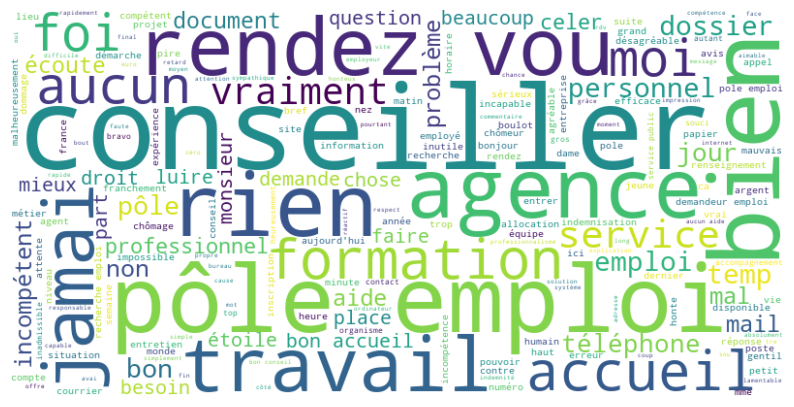

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concaténer tous les textes dans une seule chaîne de caractères
text = ' '.join(all_data['cleaned_text'].values)

# Créer l'objet WordCloud avec les paramètres souhaités
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pos = all_data[all_data['rate'] >= 2.5]
neg = all_data[all_data['rate'] < 2.5]

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [ ]:
corpus = [
    "Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.",
    "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
    "Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.", 
    "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable.",
    # Ajoutez d'autres reviews ici
]

In [ ]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [ ]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [ ]:
hello = ["Une équipe recruté pour ces compétences en manipulation, tout est fait pour vous pousser à la faute et obtenir le saint graal de la radiation, du coup de téléphone à 1 sonnerie (si vous ne répondez vous recevez un mail vous indiquant être radié pour manquement à vos obligations), à la soit disant non réception de mail ou justificatifs, pareil radiation alors que vous disposez de toutes les preuves d'envoi.\
Un conseiller qui cherche à vous faire dire ce que vous n'avez pas dit pour vous faire sortir de vos ""obligations"" et donc justifié une radiation."]

In [ ]:
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

preprocessed_corpus = [preprocess_text(review) for review in corpus]

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

# Construction du corpus négatif
negative_reviews = []
for review in preprocessed_corpus:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:
        negative_reviews.append(review)

# Création de la matrice c-TF-IDF
stopwords = set(stopwords.words("french"))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)




# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-10:][::-1]  # Sélectionne les 5 scores les plus importants
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))  # Supprime les doublons

print("Mots les plus récurrents pour les commentaires négatifs :")
print(top_negative_words)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Mots les plus récurrents pour les commentaires négatifs :
['prix', 'incompétent', 'aimé', 'personnel', 'vraiment', 'immangeable', 'endroit', 'tout', 'service', 'médiocre', 'nourriture', 'impoli', 'recommande', 'offrent', 'exorbitants', 'établissement', 'horrible', 'cet', 'lieu']


In [ ]:
df_sample

,rate,review_text,object_address,sentiment,cleaned_text,preprocessed_text,result
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,formation financement refus refus parcours inu...,formation financement refus refus parcours inu...,fabien
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci faire rond p...,aucun respect pourtant bien souci faire rond p...,fourni
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,fonctionnaire incompétent arrogant prétentieux...,fonctionnaire incompétent arrogant prétentieux...,document
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,aucun respect pourtant bien souci air hautain ...,aucun respect pourtant bien souci air hautain ...,citoyen
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,étoile mettrai conseiller indemnisation désagr...,étoile mettrai conseiller indemnisation désagr...,droit
5,1,Une conseillère carrément hautaine au téléphon...,"5 Rue de Quimper, 68100 Mulhouse",0,conseiller hautain téléphone démarche conjoint...,conseiller hautain téléphone démarche conjoint...,conseiller
6,1,Les travailleurs sous-scolarisés ont un fouill...,"5 Rue de Quimper, 68100 Mulhouse",0,travailleur fouillis document,travailleur fouillis document,air
7,1,Mauvaise expérience avec cette établissement. ...,"5 Rue de Quimper, 68100 Mulhouse",0,mauvais expérience établissement général pôle ...,mauvais expérience établissement général pôle ...,incompétent
8,1,On a un rendez-vous mais on doit attendre enco...,"5 Rue de Quimper, 68100 Mulhouse",0,rendez-vous minute inaccessible,rendez vous minute inaccessible,région
9,1,"Bonjour, en ce moment il n'y a pas de Pôle emp...","5 Rue de Quimper, 68100 Mulhouse",0,bonjour moment pôle région,bonjour moment pôle région,inutile


In [ ]:
# Création de la matrice c-TF-IDF avec n-grams
vectorizer = TfidfVectorizer(stop_words=list(stopwords), ngram_range=(1, 3))
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)

# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-5:][::-1]  # Sélectionne les 10 scores les plus importants
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))  # Supprime les doublons

print("Mots les plus récurrents pour les commentaires négatifs :")
print(top_negative_words)


Mots les plus récurrents pour les commentaires négatifs :
['recommande', 'lieu horrible service', 'nourriture immangeable', 'incompétent recommande vraiment', 'immangeable', 'offrent', 'endroit', 'exorbitants offrent', 'exorbitants', 'établissement', 'horrible service médiocre', 'incompétent recommande', 'impoli incompétent', 'service', 'aimé']


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

df = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
df['cleaned_text'].dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['cleaned_text'] = df['review_text'].astype(str)
df = df.head(10)

def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

# Assume you have a dataframe called 'df' with a column 'reviews' containing the negative reviews

preprocessed_reviews = df['cleaned_text'].apply(preprocess_text)

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

negative_words = []

for review in preprocessed_reviews:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:  # Negative label
        words = review.split()
        negative_words.append(words)

df['negative_words'] = negative_words

# Ajout de la partie supplémentaire
stopwords_list = stopwords.words("french")
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
negative_reviews = [' '.join(words) for words in df['negative_words']]
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)

# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-10:][::-1]
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords_list]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))

# Ajout des top_negative_words en tant que nouvelle colonne dans le dataframe
df['top_negative_words'] = pd.Series(top_negative_words)


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
df

,rate,review_text,object_address,sentiment,cleaned_text,negative_words,top_negative_words
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,Pas de formation possible Pas de financement p...,"[pas, de, formation, possible, pas, de, financ...",peuvent
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ...",cette
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,"Les fonctionnaires incompétents, arrogants et ...","[les, fonctionnaires, incompétents, arrogants,...",document
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ...",souhaite
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,Si je pouvais ne pas mettre d'étoiles je n'en ...,"[si, je, pouvais, ne, pas, mettre, d, étoiles,...",incompétents
5,1,Une conseillère carrément hautaine au téléphon...,"5 Rue de Quimper, 68100 Mulhouse",0,Une conseillère carrément hautaine au téléphon...,"[une, conseillère, carrément, hautaine, au, té...",possible
6,1,Les travailleurs sous-scolarisés ont un fouill...,"5 Rue de Quimper, 68100 Mulhouse",0,Les travailleurs sous-scolarisés ont un fouill...,"[les, travailleurs, sous, scolarisés, ont, un,...",médiocres
7,1,Mauvaise expérience avec cette établissement. ...,"5 Rue de Quimper, 68100 Mulhouse",0,Mauvaise expérience avec cette établissement. ...,"[mauvaise, expérience, avec, cette, établissem...",emploi
8,1,On a un rendez-vous mais on doit attendre enco...,"5 Rue de Quimper, 68100 Mulhouse",0,On a un rendez-vous mais on doit attendre enco...,"[on, a, un, rendez, vous, mais, on, doit, atte...",mauvaise
9,1,"Bonjour, en ce moment il n'y a pas de Pôle emp...","5 Rue de Quimper, 68100 Mulhouse",0,"Bonjour, en ce moment il n'y a pas de Pôle emp...","[bonjour, en, ce, moment, il, n, y, a, pas, de...",méprisable


In [ ]:
from collections import Counter
split_it = streemed_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
cleaned_text = cleaned_text(example)

In [ ]:
example = stem_text(clean_text)


In [ ]:
all_data.to_csv('all_data.csv', index=False)

In [ ]:

fr = spacy.load("fr_core_news_sm")

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

# Appeler la fonction lemmatize_text() sur le texte
lemmatized_text = lemmatize_text(clean_text)

In [ ]:
lemmatized_text

In [ ]:
lemmatized_text
from collections import Counter
split_it = lemmatized_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
lemmatized_text

In [ ]:
from PIL import Image
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

Prendre un n gram 

In [ ]:
lemmatized_text_modified = ' '.join([word for word in lemmatized_text.split() if len(word) > 3])


In [ ]:
lemmatized_text_modified

In [ ]:
from collections import Counter
split_it = lemmatized_text_modified.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

In [ ]:
import pandas as pd

# Exemple de DataFrame avec une colonne 'text'
data = pd.DataFrame({'text': ['service client, aidez-moi s\'il vous plaît', 'j\'ai besoin d\'aide', 'merci pour votre soutien']})

# Appliquer la transformation sur chaque valeur de la colonne 'text'
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))

data


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)


In [ ]:
cleaned_text = cleaned_text(exemple)

In [ ]:
cleaned_text

In [ ]:
from collections import Counter

# Utiliser la méthode apply() pour appliquer split() à chaque élément de la série
split_it = cleaned_text.apply(lambda x: x.split())

# Compter les occurrences des mots
word_counts = Counter([word for sublist in split_it for word in sublist])
word_counts


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)
cleaned_text_str = " ".join(cleaned_text)

import spacy
nlp = spacy.load("fr_core_news_sm")
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

def  stem_text(text):
    doc = fr(text)
    stem_sentences = []
    for sent in doc.sents:
        stem_tokens = [stemmer.stem(token.text) for token in sent]
        stem_sentence = " ".join(stem_tokens)
        stem_sentences.append(stem_sentence)
    return " ".join(stem_sentences)

stemmed_text = stem_text(cleaned_text_str)
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    
    # Enlever les apostrophes
    text = re.sub(r'\'', ' ', text)
    # Enlever les points
    text = re.sub(r'\.', ' ', text)
    # Enlever les virgules
    text = re.sub(r',', ' ', text)

    # Enlever les ponctuations et les caractères spéciaux
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Enlever les stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Enlever les chiffres et les nombres
    text = re.sub(r'\d+', '', text)
    
    # Enlever les mots de 2 lettres
    text = ' '.join([word for word in text.split() if len(word) > 2])

    return text

# Appeler la fonction clean_text() sur la variable stemmed_text
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
clean_stemmed_text

In [ ]:
#counter
from collections import Counter
clean_stemmed_text_counter = Counter(clean_stemmed_text.split())
clean_stemmed_text_counter

In [ ]:
all_data['sentiment'] = all_data['rate'].apply(lambda x: 1 if x >= 2.5 else 0)

In [ ]:
all_data.to_csv('all_data.csv', index=False)

In [ ]:
df_ps = all_data[all_data['sentiment'] == 1].to_csv('df_ps.csv', index=False)

In [ ]:
df_ng = all_data[all_data['sentiment'] == 0].to_csv('df_ng.csv', index=False)

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

df = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/Cleaning_eda/df_ng.csv')
df['cleaned_text'].dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['cleaned_text'] = df['review_text'].astype(str)
df = df.head(10)
def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

# Assume you have a dataframe called 'df' with a column 'reviews' containing the negative reviews

preprocessed_reviews = df['cleaned_text'].apply(preprocess_text)

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

negative_words = []

for review in preprocessed_reviews:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:  # Negative label
        words = review.split()
        negative_words.append(words)

df['negative_words'] = negative_words


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
df

,rate,review_text,object_address,sentiment,cleaned_text,negative_words
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",0,Pas de formation possible Pas de financement p...,"[pas, de, formation, possible, pas, de, financ..."
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ..."
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",0,"Les fonctionnaires incompétents, arrogants et ...","[les, fonctionnaires, incompétents, arrogants,..."
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",0,"Aucun respect, j’explique pourtant bien mon so...","[aucun, respect, j, explique, pourtant, bien, ..."
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",0,Si je pouvais ne pas mettre d'étoiles je n'en ...,"[si, je, pouvais, ne, pas, mettre, d, étoiles,..."
5,1,Une conseillère carrément hautaine au téléphon...,"5 Rue de Quimper, 68100 Mulhouse",0,Une conseillère carrément hautaine au téléphon...,"[une, conseillère, carrément, hautaine, au, té..."
6,1,Les travailleurs sous-scolarisés ont un fouill...,"5 Rue de Quimper, 68100 Mulhouse",0,Les travailleurs sous-scolarisés ont un fouill...,"[les, travailleurs, sous, scolarisés, ont, un,..."
7,1,Mauvaise expérience avec cette établissement. ...,"5 Rue de Quimper, 68100 Mulhouse",0,Mauvaise expérience avec cette établissement. ...,"[mauvaise, expérience, avec, cette, établissem..."
8,1,On a un rendez-vous mais on doit attendre enco...,"5 Rue de Quimper, 68100 Mulhouse",0,On a un rendez-vous mais on doit attendre enco...,"[on, a, un, rendez, vous, mais, on, doit, atte..."
9,1,"Bonjour, en ce moment il n'y a pas de Pôle emp...","5 Rue de Quimper, 68100 Mulhouse",0,"Bonjour, en ce moment il n'y a pas de Pôle emp...","[bonjour, en, ce, moment, il, n, y, a, pas, de..."


In [133]:
texte

'Pas de formation possible Pas de financement possible refus sur refus de parcours Et rendez vous régulier inutile. Dire que soit disant on est la pour Aider les chômeurs a être réactif. Absurde ! Aucun respect, j’explique pourtant bien mon soucis mais on fait exprès de ne pas comprendre et de faire tourner en rond. Pourtant tout les document son fourni. Les fonctionnaires incompétents, arrogants et prétentieux, ils ont transformé pôle emploi comme un bunker, traitant les pauvres chômeurs comme des citoyens de cinquième classe, nous obligeant à mendier nos droits. Aucun respect, j’explique pourtant bien mon soucis mais on fait exprès de ne pas comprendre. Un air hautain et discriminant. Je ne souhaite pas à ses personnes de rencontrer quelconque soucis de la vie, à moins qu’ils en accumulent tellement que c’est leur façon de se venger de leur vies médiocres, ennuyeuses, déprimantes. Si je pouvais ne pas mettre d\'étoiles je n\'en mettrais pas, conseillère des indemnisations hyper désag

In [135]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Charger le modèle de langue français
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000

# Texte d'exemple


# Analyse de dépendance des phrases et lemmatisation
doc = nlp(texte)
dependances_incluses = ['dep1', 'dep2']  # Replace with the dependency labels you want to include
stop_words = []  # Replace with your list of stop words if needed
lemmatized_terms = [token.lemma_ for token in doc if token.dep_ in dependances_incluses and token.text.lower() not in stop_words]

# Utilisation des trigrammes
use_trigrams = False

if use_trigrams:
    # Génération des trigrammes
    trigrams = list(ngrams(lemmatized_terms, 3, pad_left=True, pad_right=True))
    trigram_terms = [' '.join(trigram) for trigram in trigrams]
    terms_for_cloud = trigram_terms
else:
    # Utilisation des mots lemmatisés
    terms_for_cloud = lemmatized_terms

# Compter l'occurrence des termes pour le nuage de mots
occurrence_terms = Counter(terms_for_cloud)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(occurrence_terms)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.